# Exploratory Data Analysis
Exploratory Data Analysis (EDA) is the process of understanding the data you are dealing with by using summary statistics and visualizations. The goal of EDA is to gain insights into the data and its relationships, which can help in better modeling and feature engineering. It is considered a crucial step in data modeling.

## 3.1 Correlation
Correlation is a way to seeing the relationships between two values. If they one goes up or down in tandem with other, they have a positive correlation (the correlation coefficient usually displays a positive value). If one goes up while the other goes down, they have a negative correlation (the correlation coefficient usually displays a negative value). If there’s no pattern, they have no correlation (the correlation coefficient usually displays a zero value). The correlation value is a number between -1 and 1 that tells you how strong the relationship is

In [1]:
from EffectiveXGBoost import *

In [2]:
path_url = 'https://github.com/mattharrison/datasets/raw/master/data/kaggle-survey-2018.zip'
file_name = 'kaggle-survey-2018.zip'
dataset = 'multipleChoiceResponses.csv'

In [3]:
survey_df = extract_dataset(path_url, file_name, dataset)
final_df = prep_data(survey_df)
final_df

G:\My Drive\SisengAI\AlgorithmicTrading\code_rebuilding\MattHarrison\EffectiveXGBoost\EffectiveXGBoost.py:50: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  all_df = pd.read_csv(z.open(dataset))


,Q1,Q3,age,education,major,years_exp,compensation,python,r,sql
1,Female,United States of America,45,20.0,other,NaN,0,0,0,0
2,Male,Indonesia,30,16.0,eng,5.0,10000,0,0,1
3,Female,United States of America,30,18.0,cs,0.0,0,0,1,0
4,Male,United States of America,35,18.0,other,NaN,0,1,1,1
5,Male,India,22,18.0,stat,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
23855,Male,France,45,20.0,cs,5.0,250000,1,1,1
23856,Female,Turkey,25,18.0,eng,NaN,0,0,0,0
23857,Male,Turkey,22,18.0,cs,0.0,10000,0,0,0
23858,Male,United Kingdom of Great Britain and Northern I...,25,NaN,other,NaN,0,0,0,0


In [4]:
pline = pipeline.Pipeline(
    [('tweak', PrepDataTransformer()),
    ('cat', encoding.OneHotEncoder(top_categories=5, drop_last=True,
    variables=['Q1', 'Q3', 'major'])),
    ('num_impute', imputation.MeanMedianImputer(imputation_method='median',
                variables=['education', 'years_exp']))]
    )

In [5]:
X, y = prepX_y(survey_df, 'Q6')

In [6]:
sur_X_train, sur_X_test, sur_y_train, sur_y_test = (model_selection
                                    .train_test_split(X, y, 
                                                      test_size=.3, 
                                                      random_state=42, 
                                                      stratify=y)
                                                        )

In [7]:
X_train = pline.fit_transform(sur_X_train, sur_y_train)
X_test = pline.transform(sur_X_test)
X_train

,age,education,years_exp,compensation,python,r,sql,Q1_Male,Q1_Female,Q1_Prefer not to say,Q1_Prefer to self-describe,Q3_United States of America,Q3_India,Q3_China,major_cs,major_other,major_eng,major_stat
587,25,18.0,4.0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0
3065,22,16.0,1.0,10000,1,0,0,1,0,0,0,0,1,0,1,0,0,0
8435,22,18.0,1.0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0
3110,40,20.0,3.0,125000,1,0,1,0,1,0,0,1,0,0,0,1,0,0
16372,45,12.0,5.0,100000,1,0,1,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16608,25,16.0,2.0,10000,0,0,1,1,0,0,0,0,1,0,1,0,0,0
7325,18,16.0,1.0,30000,1,0,1,1,0,0,0,1,0,0,1,0,0,0
21810,18,16.0,2.0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
4917,25,18.0,1.0,100000,1,0,1,1,0,0,0,1,0,0,0,0,0,1


In [8]:
(X_train
 .assign(data_scientist = sur_y_train == "Data Scientist")
 .corr(method='spearman')
 .style
 .background_gradient(cmap='PiYG', vmax=1, vmin=-1)
 .set_sticky(axis='index')
)

,age,education,years_exp,compensation,python,r,sql,Q1_Male,Q1_Female,Q1_Prefer not to say,Q1_Prefer to self-describe,Q3_United States of America,Q3_India,Q3_China,major_cs,major_other,major_eng,major_stat,data_scientist
age,1.000000,0.345717,0.644863,0.451349,0.046651,0.127667,0.134325,0.014277,-0.033693,0.051232,0.041474,0.371123,-0.363626,-0.023384,-0.223529,0.201910,0.006262,0.073864,0.075440
education,0.345717,1.000000,0.098849,0.241393,0.060259,0.151244,0.066620,-0.079534,0.064777,0.060984,0.002701,0.272790,-0.273408,-0.006441,-0.216724,0.164771,-0.001043,0.121294,0.266717
years_exp,0.644863,0.098849,1.000000,0.255164,-0.055408,0.012090,0.050181,0.083624,-0.097564,0.034470,0.016784,0.117912,-0.136666,0.029630,-0.046551,0.018267,0.004264,0.042917,-0.145461
compensation,0.451349,0.241393,0.255164,1.000000,0.165070,0.171485,0.201336,0.000967,0.002912,-0.035554,0.049881,0.616759,-0.556154,-0.123281,-0.225934,0.241580,-0.060256,0.109100,0.174434
python,0.046651,0.060259,-0.055408,0.165070,1.000000,0.183665,0.287957,0.039944,-0.039207,-0.006729,-0.000553,0.052339,-0.043101,-0.017642,-0.095136,0.093887,0.008640,0.013474,0.121741
r,0.127667,0.151244,0.012090,0.171485,0.183665,1.000000,0.276862,-0.066982,0.068157,0.004831,-0.004454,0.178682,-0.105625,-0.133029,-0.205538,0.139994,-0.022082,0.162942,0.329124
sql,0.134325,0.066620,0.050181,0.201336,0.287957,0.276862,1.000000,-0.026692,0.032639,-0.010814,-0.018499,0.166587,-0.107382,-0.108406,-0.130081,0.109862,-0.012964,0.073906,0.117941
Q1_Male,0.014277,-0.079534,0.083624,0.000967,0.039944,-0.066982,-0.026692,1.000000,-0.957007,-0.222963,-0.094664,-0.144665,0.116961,0.052566,0.062605,-0.071139,0.028492,-0.039544,-0.091126
Q1_Female,-0.033693,0.064777,-0.097564,0.002912,-0.039207,0.068157,0.032639,-0.957007,1.000000,-0.045225,-0.019201,0.131051,-0.105490,-0.048434,-0.049753,0.064054,-0.034760,0.036779,0.086614
Q1_Prefer not to say,0.051232,0.060984,0.034470,-0.035554,-0.006729,0.004831,-0.010814,-0.222963,-0.045225,1.000000,-0.004473,0.046366,-0.038587,-0.014918,-0.045908,0.010336,0.029149,0.021052,0.018540


The greenest correlation with Data Scientist from the above is `R` with a coefficient of $0.33$. So we take that next and plot them with a bar plot

## Bar Plot

In [9]:
import matplotlib.pyplot as plt

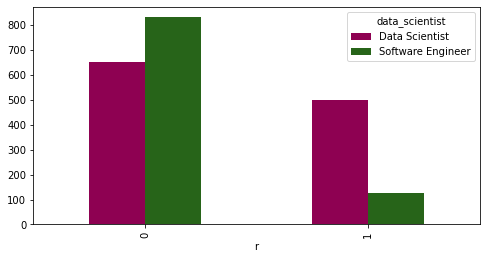

In [10]:
fig, ax = plt.subplots(figsize=(8, 4))

(X_train
.assign(data_scientist = sur_y_train)
.groupby('r')
.data_scientist
.value_counts()
.unstack()
.plot.bar(ax=ax, colormap='PiYG')
);

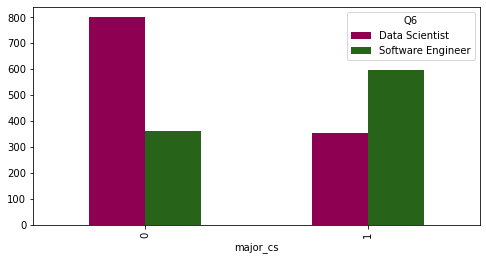

In [11]:
fig, ax = plt.subplots(figsize=(8, 4))
_= (pd.crosstab(index=X_train['major_cs'],
    columns=y)
.plot.bar(ax=ax, colormap='PiYG')
)

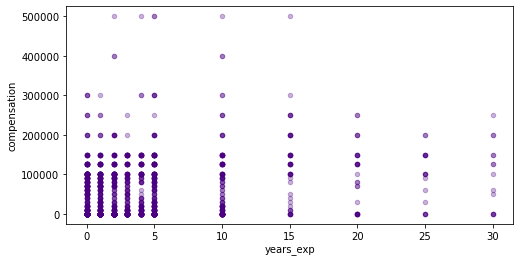

In [12]:
fig, ax = plt.subplots(figsize=(8, 4))
_= (X_train
.plot.scatter(x='years_exp', 
              y='compensation', 
              alpha=.3, ax=ax, 
              color='indigo')
)

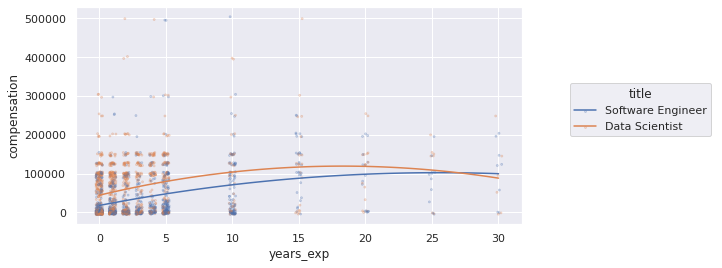

In [13]:
import seaborn.objects as so
fig = plt.figure(figsize=(8, 4))
_= (so
.Plot(X_train.assign(title=sur_y_train), x='years_exp', y='compensation', color='title')
.add(so.Dots(alpha=.3, pointsize=2), so.Jitter(x=.5, y=10_000))
.add(so.Line(), so.PolyFit())
.on(fig) # not required unless saving to image
.plot() # ditto
)

There are two things of note from this plot:
* It indicates that data scientists tend to earn more than software engineers.
* It is very possible that different regions compensate deifferently, lets separate the regions in our next plot.

We will make use of the `Seaborn objects` again, but this time to utilize the facet method to view the plots by country.

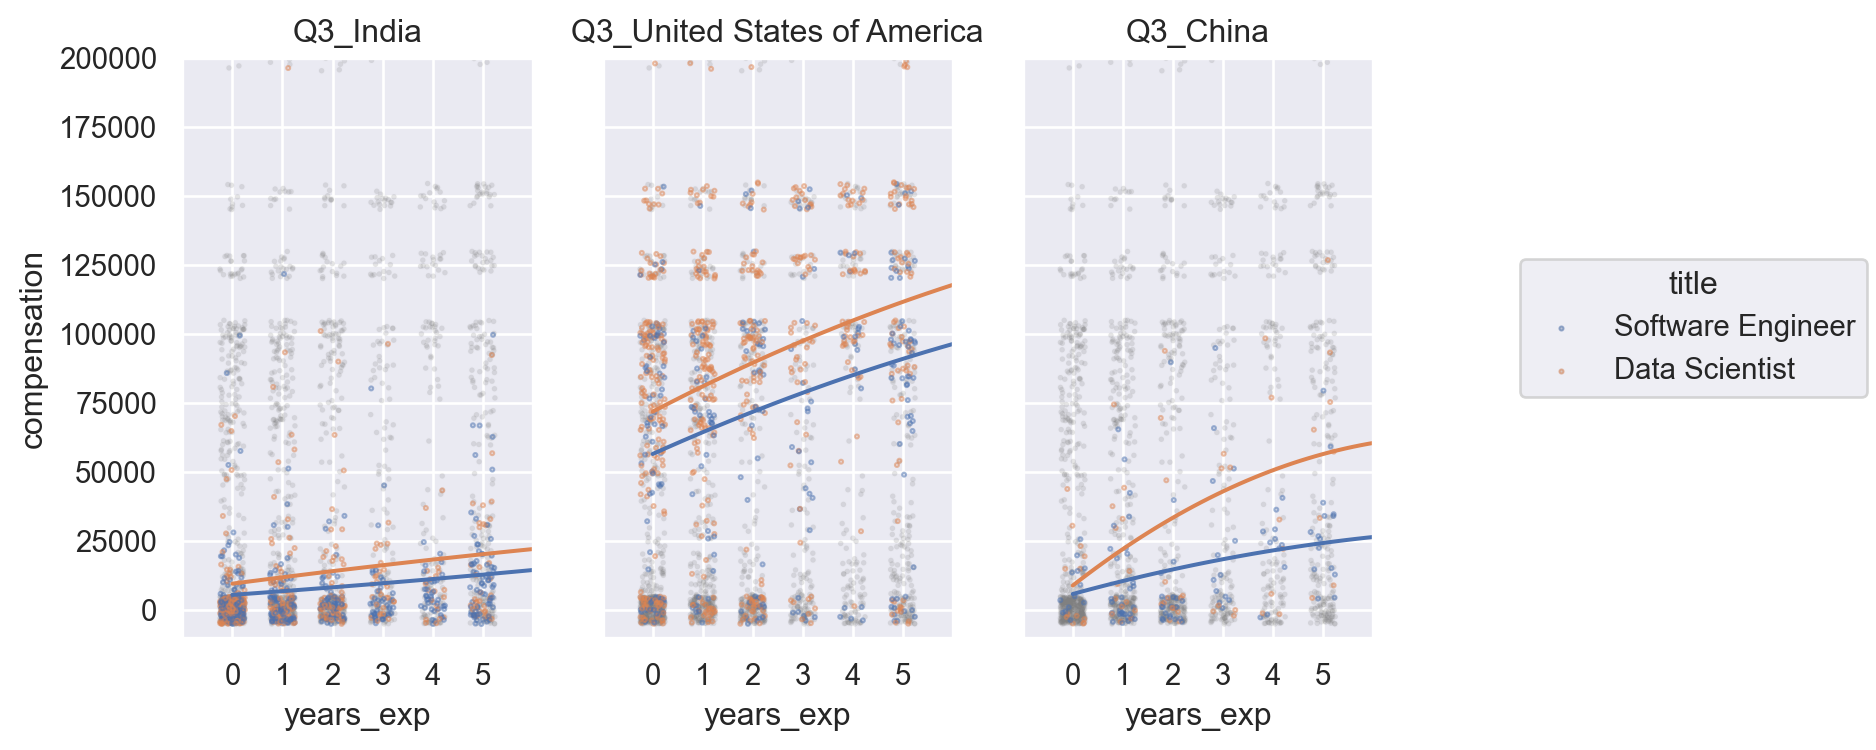

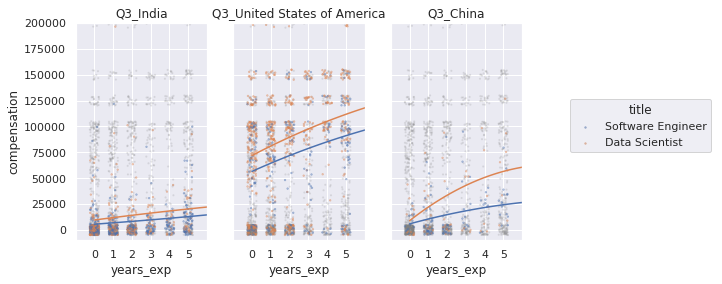

In [16]:
fig = plt.figure(figsize=(8, 4))
(so
 .Plot(X_train
       #.query('compensation < 200_000 and years_exp < 16')
       .assign(title=sur_y_train,
               country=(X_train
                        .loc[:, 'Q3_United States of America': 'Q3_China']
                        .idxmax(axis='columns')
                       )
              ), 
       x='years_exp', 
       y='compensation', 
       color='title')
 .facet('country')
 .add(so.Dots(alpha=.01, pointsize=2, color='grey' ), so.Jitter(x=.5, y=10_000), col=None)
 .add(so.Dots(alpha=.5, pointsize=1.5), so.Jitter(x=.5, y=10_000))
 .add(so.Line(pointsize=1), so.PolyFit(order=2))
 .scale(x=so.Continuous().tick(at=[0,1,2,3,4,5]))
 .limit(y=(-10_000, 200_000), x=(-1, 6)) # zoom in with this not .query (above)
 .on(fig) # not required unless saving to image
 .plot() # ditto
)